<H1>Is there any NULL values in dataset?</H1>

we will have to divide our dataframe into 2 parts: for validation(20%) and for ml(80%). I haven't separated it
 yet. We will have to update this plots then.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/credit_score.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

As we see, there are no NULL values in our dataset and all columns (except CUST_ID) are numeric.

In [2]:
data.describe()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,121610.019000,4.131896e+05,7.907180e+05,4.063477,6.068449,5.867252,6822.401000,3466.320000,0.454848,0.055557,...,0.943607,0.913340,0.605276,0.944000,0.236000,0.173000,0.993000,0.15000,586.712000,0.284000
std,113716.699591,4.429160e+05,9.817904e+05,3.968097,5.847878,16.788356,7486.225932,5118.942977,0.236036,0.037568,...,0.168989,1.625278,1.299382,0.230037,0.424835,0.378437,0.083414,0.35725,63.413882,0.451162
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003400,...,0.666700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,300.000000,0.000000
25%,30450.250000,5.971975e+04,5.396675e+04,1.000000,1.454500,0.206200,1084.500000,319.500000,0.263950,0.029700,...,0.833300,0.158700,0.100000,1.000000,0.000000,0.000000,1.000000,0.00000,554.750000,0.000000
50%,85090.000000,2.738505e+05,3.950955e+05,2.545450,4.911550,2.000000,4494.000000,1304.000000,0.468850,0.046800,...,0.909100,0.327950,0.178600,1.000000,0.000000,0.000000,1.000000,0.00000,596.000000,0.000000
75%,181217.500000,6.222600e+05,1.193230e+06,6.307100,8.587475,4.509600,10148.500000,4555.500000,0.626300,0.069400,...,1.000000,0.833300,0.588200,1.000000,0.000000,0.000000,1.000000,0.00000,630.000000,1.000000
max,662094.000000,2.911863e+06,5.968620e+06,16.111200,37.000600,292.842100,43255.000000,39918.000000,1.058300,0.251700,...,2.000200,10.009900,10.005300,1.000000,1.000000,1.000000,1.000000,1.00000,800.000000,1.000000


<H1>Which features are correlated?</H1>

In [3]:
data = data.drop('CUST_ID', axis = 1)

/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_13664/521141270.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

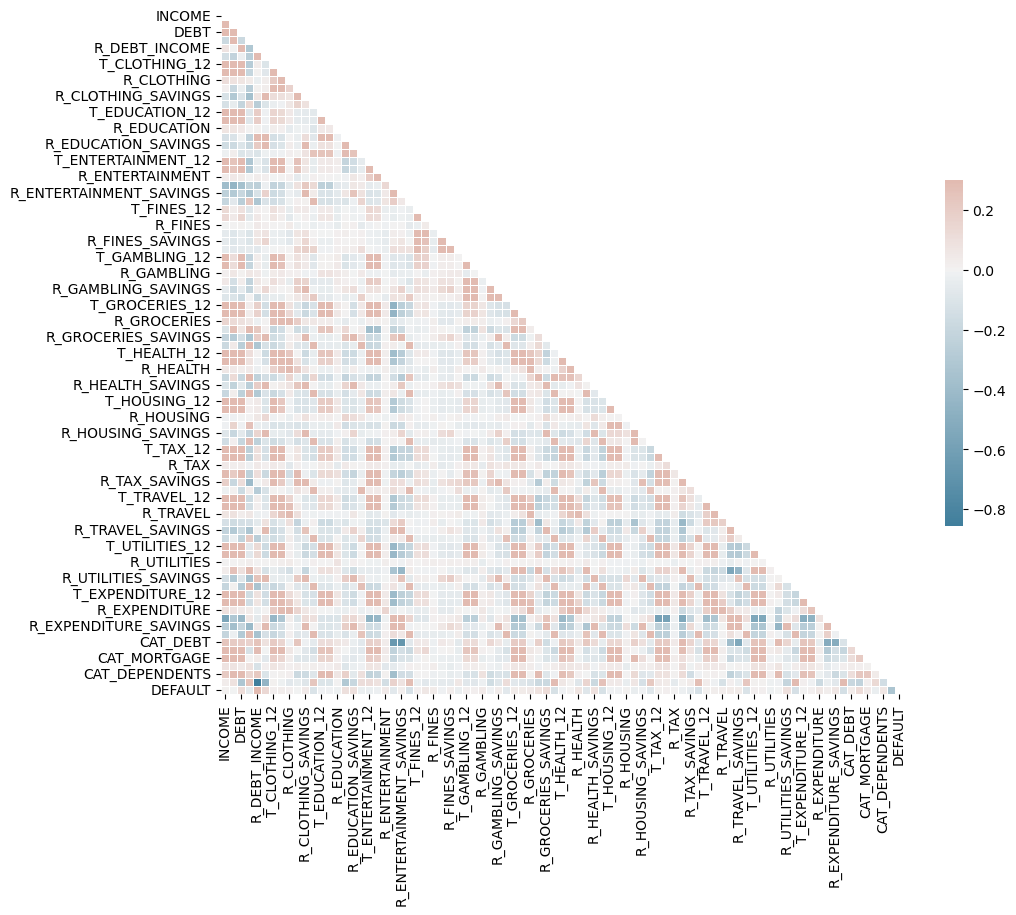

In [4]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

It is better to divide all 84 columns in groups and try to present correlations in these groups, because there are A LOT OF correlated columns, which we can drop

array([[<AxesSubplot: title={'center': 'INCOME'}>,
        <AxesSubplot: title={'center': 'SAVINGS'}>,
        <AxesSubplot: title={'center': 'DEBT'}>,
        <AxesSubplot: title={'center': 'R_SAVINGS_INCOME'}>,
        <AxesSubplot: title={'center': 'R_DEBT_INCOME'}>,
        <AxesSubplot: title={'center': 'R_DEBT_SAVINGS'}>,
        <AxesSubplot: title={'center': 'T_CLOTHING_12'}>,
        <AxesSubplot: title={'center': 'T_CLOTHING_6'}>,
        <AxesSubplot: title={'center': 'R_CLOTHING'}>],
       [<AxesSubplot: title={'center': 'R_CLOTHING_INCOME'}>,
        <AxesSubplot: title={'center': 'R_CLOTHING_SAVINGS'}>,
        <AxesSubplot: title={'center': 'R_CLOTHING_DEBT'}>,
        <AxesSubplot: title={'center': 'T_EDUCATION_12'}>,
        <AxesSubplot: title={'center': 'T_EDUCATION_6'}>,
        <AxesSubplot: title={'center': 'R_EDUCATION'}>,
        <AxesSubplot: title={'center': 'R_EDUCATION_INCOME'}>,
        <AxesSubplot: title={'center': 'R_EDUCATION_SAVINGS'}>,
        <AxesS

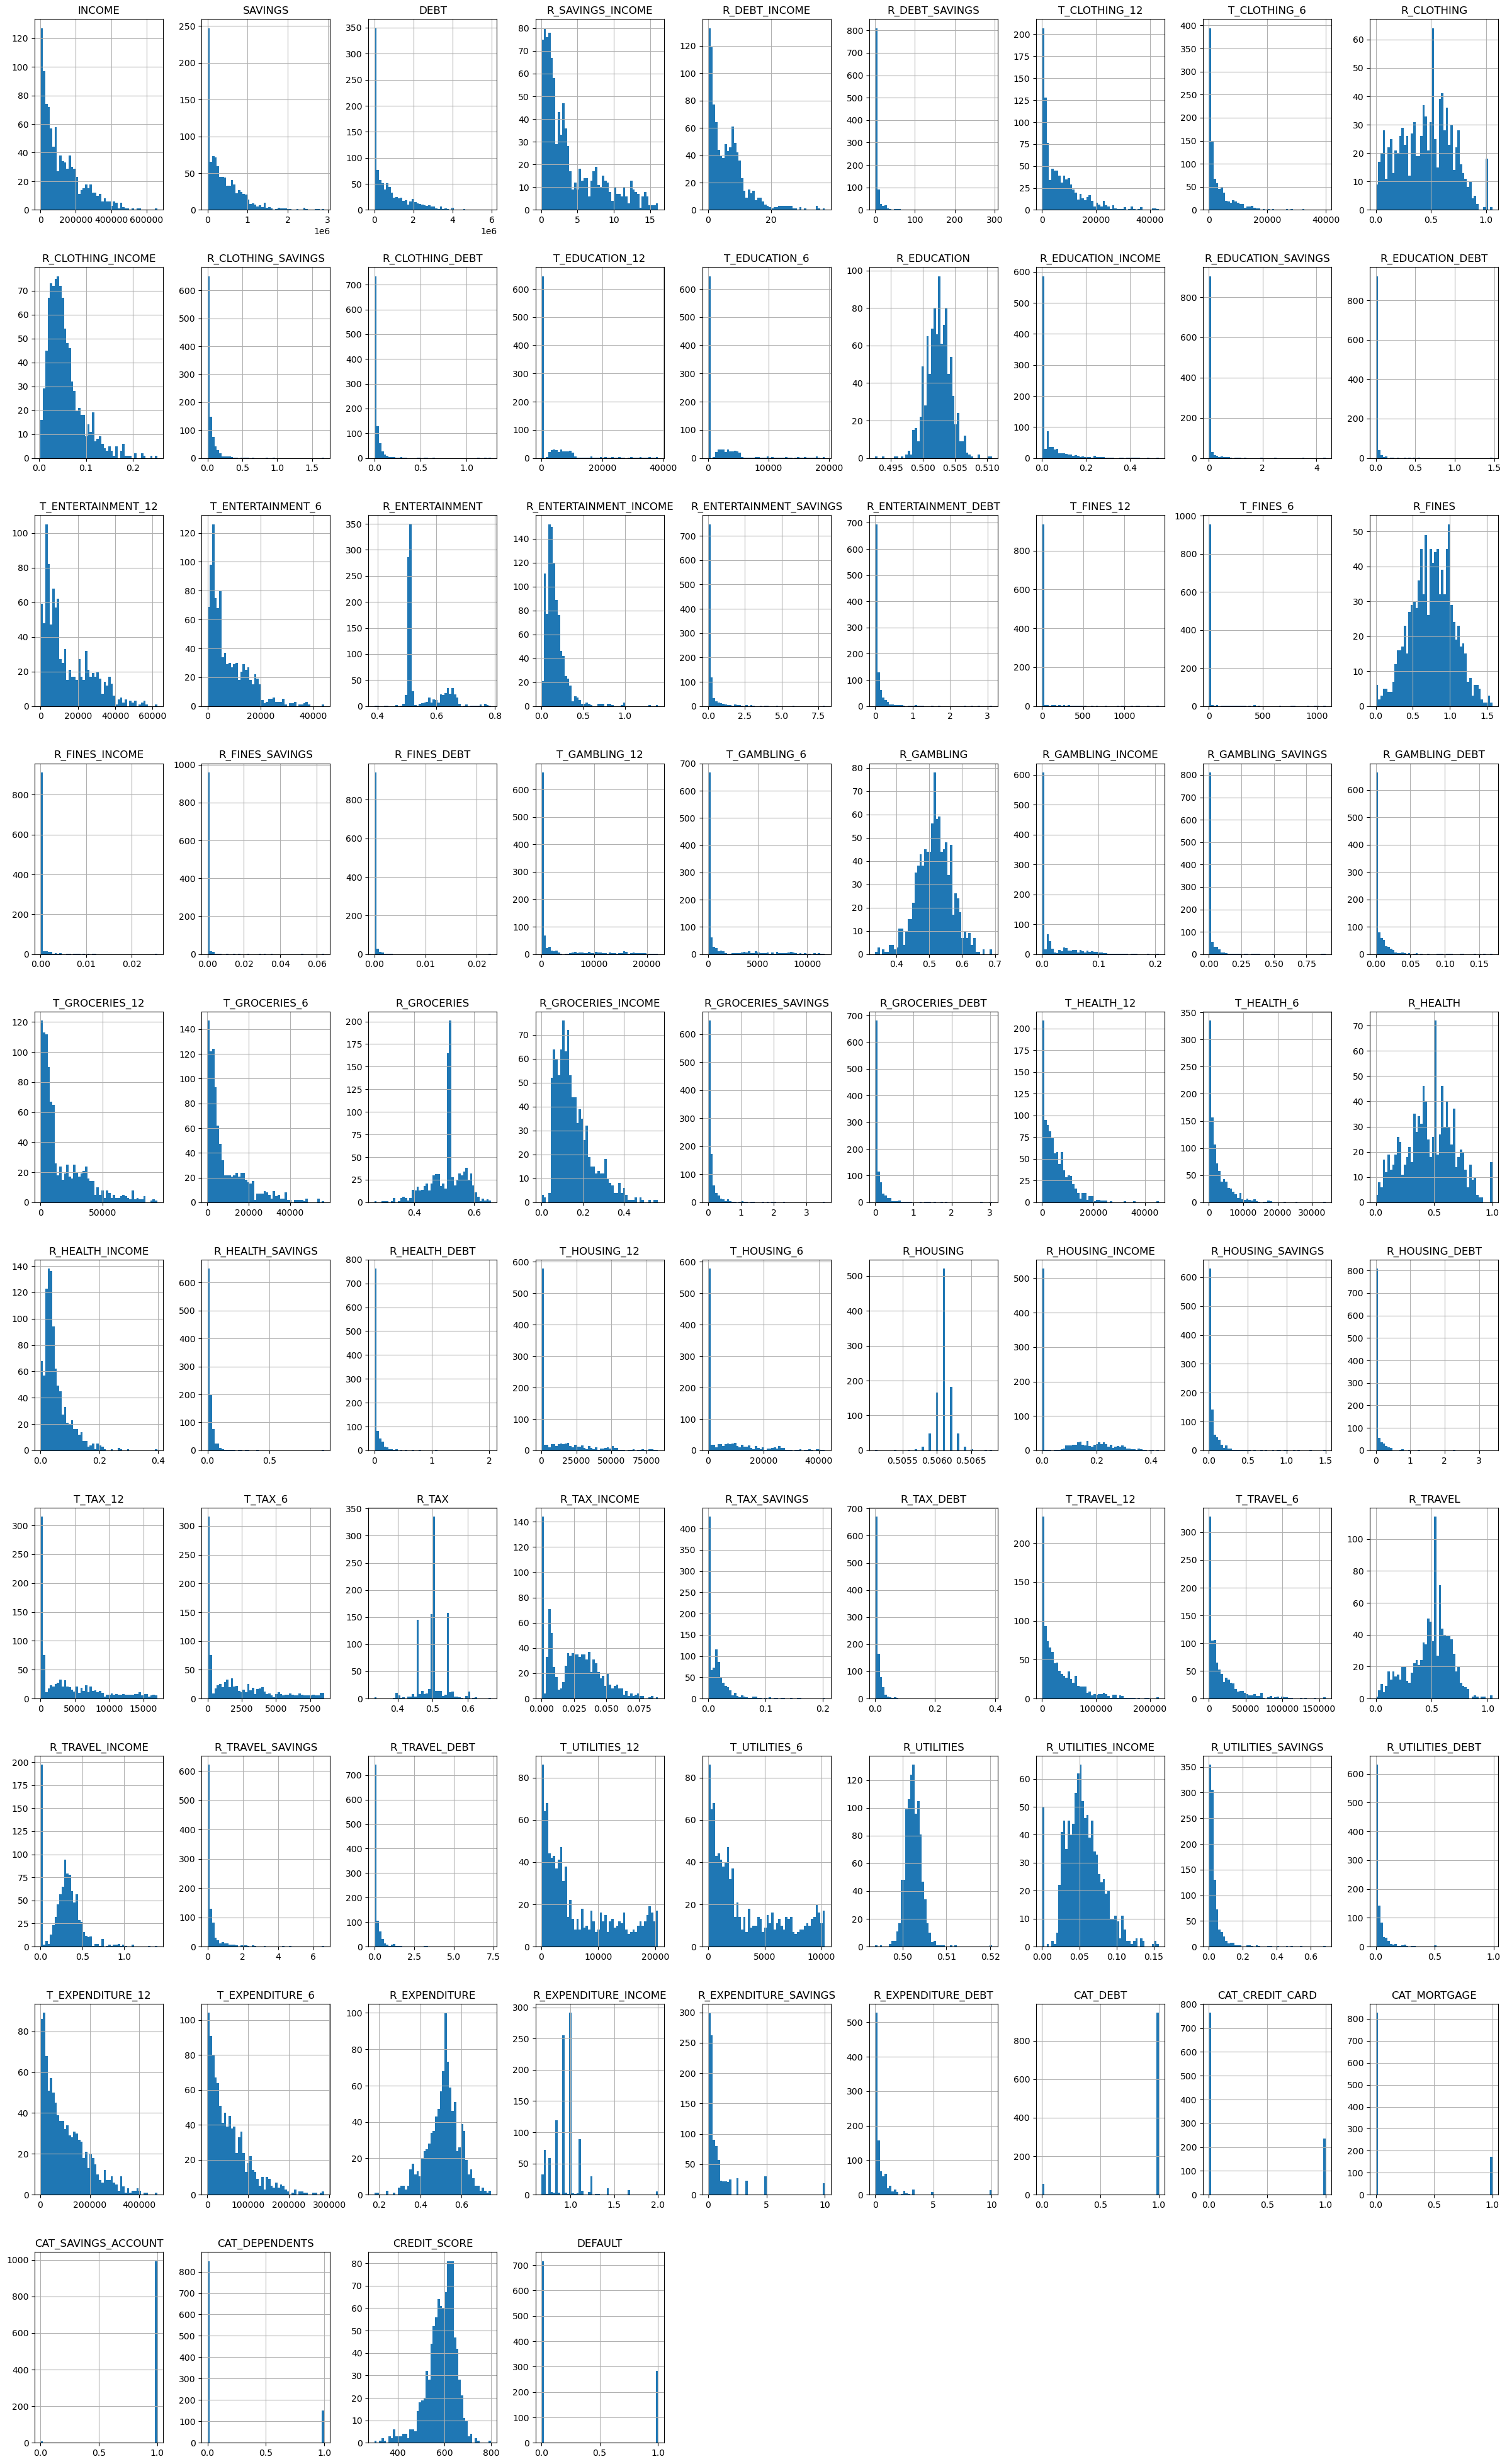

In [6]:
data.hist(bins=50, figsize=(30,50))